# HW 5
# Mohammad Hosein Ashoori - 97149068

In [7]:
import pandas as pd
from sklearn import preprocessing, decomposition
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline
matplotlib.style.use('fivethirtyeight')

UsageError: Line magic function `%` not found.


In [2]:
import random 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 

In [66]:
penguins = pd.read_csv("files/penguins.csv")
display(penguins.head())
penguins.info()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# 1 - Remove Missing Values

In [77]:
penguins_nonNull = penguins.dropna()
penguins_nonNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


# 3 - Normalization on data

In [98]:
penguins_nonNull_normal= penguins_nonNull[:]
# penguins_nonNull_normal[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].apply(stats.zscore)
penguins_nonNull_normal = pd.concat([
    penguins_nonNull_normal.select_dtypes(include=[np.number]).apply(stats.zscore),
    penguins_nonNull[['species','island','sex']]],axis=1)

encoder = preprocessing.OrdinalEncoder()
penguins_nonNull_normal.insert( 0, 'normal_species' ,encoder.fit_transform(penguins_nonNull_normal[['species']]))
penguins_nonNull_normal.insert( 0, 'normal_island' ,encoder.fit_transform(penguins_nonNull_normal[['island']]))
penguins_nonNull_normal.insert( 0, 'normal_sex' ,encoder.fit_transform(penguins_nonNull_normal[['sex']]))
penguins_nonNull_normal=penguins_nonNull_normal.drop(['species','island','sex'],axis=1)

penguins_nonNull_normal.head(10)

,normal_sex,normal_island,normal_species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1.0,2.0,0.0,-0.896042,0.780732,-1.426752,-0.568475
1,0.0,2.0,0.0,-0.822788,0.119584,-1.069474,-0.506286
2,0.0,2.0,0.0,-0.676280,0.424729,-0.426373,-1.190361
4,0.0,2.0,0.0,-1.335566,1.085877,-0.569284,-0.941606
5,1.0,2.0,0.0,-0.859415,1.747026,-0.783651,-0.692852
6,0.0,2.0,0.0,-0.932669,0.323014,-1.426752,-0.723946
7,1.0,2.0,0.0,-0.877728,1.238450,-0.426373,0.582014
12,0.0,2.0,0.0,-0.529772,0.221299,-1.355296,-1.252549
13,1.0,2.0,0.0,-0.987609,2.052171,-0.712196,-0.506286
14,1.0,2.0,0.0,-1.720150,2.001313,-0.212006,0.239977


# 2 - Split data to test and train

In [99]:
X_train, X_test = train_test_split(penguins_nonNull_normal, test_size=.2,shuffle=True)
display("Train")
display(X_train)
display("Test")
display(X_test)

'Train'

,normal_sex,normal_island,normal_species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
114,0.0,0.0,0.0,-0.804474,1.797883,-0.712196,-0.381909
46,1.0,1.0,0.0,-0.529772,0.933305,-1.355296,-0.972701
24,1.0,0.0,0.0,-0.950982,0.017869,-1.498207,-0.506286
92,0.0,1.0,0.0,-1.830031,-0.032989,-1.140929,-1.003795
158,0.0,1.0,1.0,0.385904,0.526444,-1.641118,-1.190361
...,...,...,...,...,...,...,...
86,1.0,1.0,0.0,-1.408820,1.187592,-0.783651,-0.506286
149,1.0,1.0,0.0,-1.134117,0.475587,-0.569284,-0.568475
322,0.0,0.0,2.0,0.587352,-0.846709,1.002739,0.955146
330,0.0,0.0,2.0,1.191698,-0.999282,1.074194,0.986240


'Test'

,normal_sex,normal_island,normal_species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
217,1.0,1.0,1.0,1.026876,0.526444,-0.569284,-0.537380
139,1.0,1.0,0.0,-0.786161,0.373872,-0.569284,0.053411
194,1.0,1.0,1.0,1.264952,0.984162,-0.354918,-0.817229
283,1.0,0.0,2.0,1.887611,-0.744994,2.146028,1.794692
48,0.0,1.0,0.0,-1.463761,0.373872,-0.783651,-0.941606
...,...,...,...,...,...,...,...
309,1.0,0.0,2.0,1.484714,-0.083846,2.074573,1.670315
132,0.0,1.0,0.0,-1.317253,0.679017,-0.569284,-0.879418
173,1.0,1.0,1.0,0.825428,0.170442,-0.712196,-1.003795
227,1.0,0.0,2.0,0.495785,-0.948425,1.288561,1.234995


# 4 - KNN with K==5

In [62]:
from sklearn.neighbors import KNeighborsClassifier 

In [100]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(
        X_train.loc[:, X_train.columns!='normal_species'],
        X_train[['normal_species']])



c:\Users\Cena\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [9]:
def pltmaker(X, KMeanTrained:KMeans = None ,parent_axs=None):
    
    if KMeanTrained == None :
        k_means_cluster_centers = X[:,:2]
        k_means_labels = X[:,2]
    else:
        k_means_cluster_centers = KMeanTrained.cluster_centers_
        k_means_labels = KMeanTrained.labels_
    # Colors uses a color map, which will produce an array of colors based on
    # the number of labels there are. We use set(k_means_labels) to get the
    # unique labels.
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

    
    if parent_axs :
        ax=parent_axs
    else :
        # Initialize the plot with the specified dimensions.
        fig = plt.figure(figsize=(20, 15))
        # Create a plot
        ax = fig.add_subplot(1, 1, 1)

    # For loop that plots the data points and centroids.
    # k will range from 0-3, which will match the possible clusters that each
    # data point is in.
    for k, col in zip(range(len(k_means_labels)), colors):

        # Create a list of all data points, where the data points that are 
        # in the cluster (ex. cluster 0) are labeled as true, else they are
        # labeled as false.
        my_members = (k_means_labels == k)
        
        # Define the centroid, or cluster center.
        cluster_center = k_means_cluster_centers[k]
        
        # Plots the datapoints with color col.
        ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.' , markersize=12)
        # Plots the centroids with specified color, but with a darker outline
        if KMeanTrained != None :
            ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=15)

    # Title of the plot
    ax.set_title('KMeans')

    # Remove x-axis ticks
    ax.set_xticks(())

    # Remove y-axis ticks
    ax.set_yticks(())

    # Show the plot
    if parent_axs:
        return ax
    plt.show()


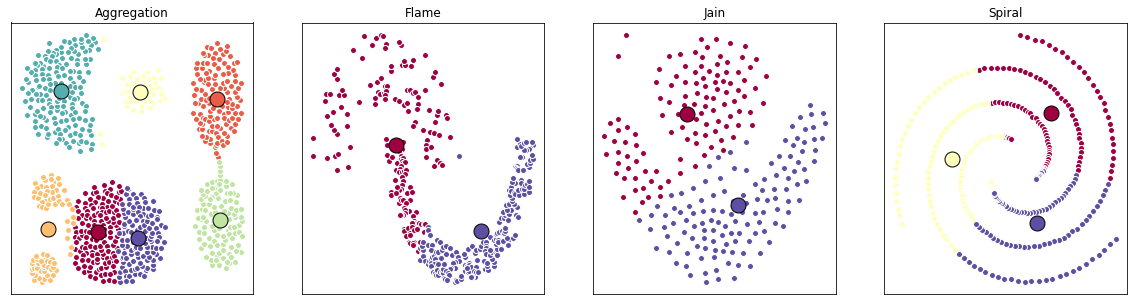

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axs[0] = pltmaker(AggregationFile,KMAggregation,axs[0])
axs[1] = pltmaker(JainFile,KMJain,axs[1])
axs[2] = pltmaker(FlameFile,KMFlame,axs[2])
axs[3] = pltmaker(SpiralFile,KMSpiral,axs[3])
for ax,name in zip(axs,["Aggregation","Flame","Jain","Spiral"]):
    ax.set_title(name)

# 3 - Agglomerative Clustering        

In [16]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

In [17]:
AgglomAggregation = AgglomerativeClustering(n_clusters = len(set(AggregationFile[:,2])), linkage = 'average')
AgglomFlame = AgglomerativeClustering(n_clusters = len(set(FlameFile[:,2])), linkage = 'average')
AgglomJain = AgglomerativeClustering(n_clusters = len(set(JainFile[:,2])), linkage = 'average')
AgglomSpiral = AgglomerativeClustering(n_clusters = len(set(SpiralFile[:,2])), linkage = 'average')



AgglomAggregation.fit(AggregationFile[:,:2],AggregationFile[:,2])
AgglomFlame.fit(FlameFile[:,:2],FlameFile[:,2])
AgglomJain.fit(JainFile[:,:2],JainFile[:,2])
AgglomSpiral.fit(SpiralFile[:,:2],SpiralFile[:,2])

AgglomerativeClustering(linkage='average', n_clusters=3)

In [18]:
def agglomCustring(data:np.array, agglom:AgglomerativeClustering,parent_axs=None):
    # Create a figure of size 6 inches by 4 inches.
    if parent_axs :
        ax=parent_axs
    else :
        # Initialize the plot with the specified dimensions.
        fig = plt.figure(figsize=(10, 10))
        # Create a plot
        ax = plt
    X1 = data[:,:2]
    y1 = data[:,2]
    # These two lines of code are used to scale the data points down,
    # Or else the data points will be scattered very far apart.

    # Create a minimum and maximum range of X1.
    x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

    # Get the average distance for X1.
    X1 = (X1 - x_min) / (x_max - x_min)

    # This loop displays all of the datapoints.
    for i in range(X1.shape[0]):
        # Replace the data points with their respective cluster value 
        # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
        # ax.plot(X1[i:, 0], X1[i:, 1], 'w',
        #  markerfacecolor=plt.cm.nipy_spectral(y1[i] / 10),
        #  marker='.' , markersize=15)
        ax.text(X1[i, 0], X1[i, 1], str(int(y1[i])),
                color=plt.cm.nipy_spectral(agglom.labels_[i] /10 ),
                fontdict={'weight': 'bold', 'size': 9},
                )

    if parent_axs :
        # Remove the x ticks, y ticks, x and y axis
        ax.set_xticks([])
        ax.set_yticks([])
    else :
        plt.xticks([])
        plt.yticks([])
    #ax.axis('off')
   
    ax.legend(['First line', 'Second line'])
        # Show the plot
    if parent_axs:
        return ax
    # Display the plot of the original data before clustering
    # Display the plot
    ax.show()

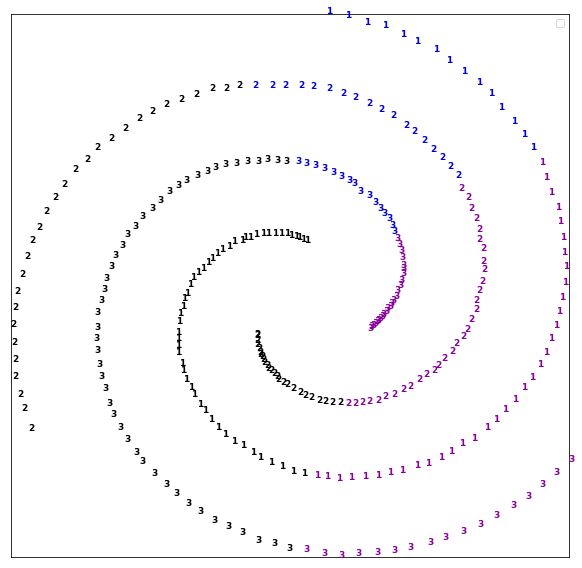

In [19]:
# agglomCustring(data=AggregationFile,agglom=AgglomAggregation,)
# agglomCustring(data=FlameFile,agglom=AgglomFlame,)
# agglomCustring(data=JainFile,agglom=AgglomJain,)
agglomCustring(data=SpiralFile,agglom=AgglomSpiral)


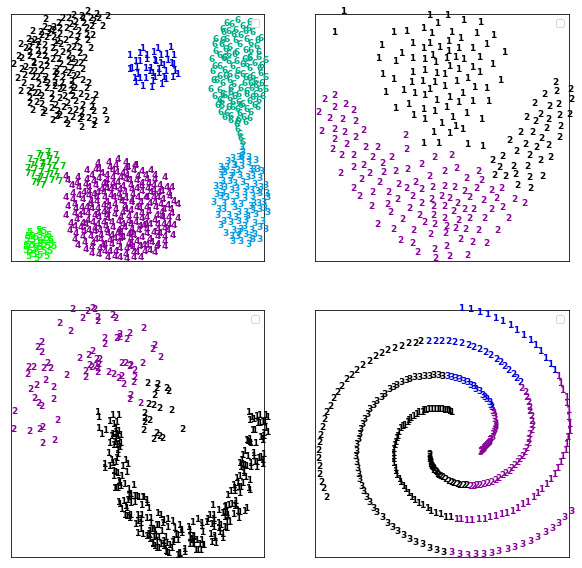

In [20]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax1 = agglomCustring(data=AggregationFile,agglom=AgglomAggregation,parent_axs=ax1)
ax2 = agglomCustring(data=FlameFile,agglom=AgglomFlame,parent_axs=ax2)
ax3 = agglomCustring(data=JainFile,agglom=AgglomJain,parent_axs=ax3)
ax4 = agglomCustring(data=SpiralFile,agglom=AgglomSpiral,parent_axs=ax4)


# 4 - DBSCAN

In [21]:
# import numpy as np 
# from sklearn.cluster import DBSCAN 
# from sklearn.datasets.samples_generator import make_blobs 
# from sklearn.preprocessing import StandardScaler 
# import matplotlib.pyplot as plt 
# %matplotlib inline

In [22]:
from sklearn.cluster import DBSCAN 

In [23]:
epsilon = 1.48
minimumSamples = 2
DBAggregation = DBSCAN(eps=1.5, min_samples=8).fit(AggregationFile[:,:2])
DBFlame = DBSCAN(eps=1.48, min_samples=12).fit(FlameFile[:,:2])
DBJain = DBSCAN(eps=2.5, min_samples=15).fit(JainFile[:,:2])
DBSpiral = DBSCAN(eps=1.65, min_samples=3).fit(SpiralFile[:,:2])
DBAggregation_labels = DBAggregation.labels_
DBFlame_labels = DBFlame.labels_
DBJain_labels = DBJain.labels_
DBSpiral_labels = DBSpiral.labels_
# DBJain_labels

In [24]:
# Firts, create an array of booleans using the labels from db.

DBAggregationـcore_samples_mask = np.zeros_like(DBAggregation.labels_, dtype=bool)
DBAggregationـcore_samples_mask[DBAggregation.core_sample_indices_] = True

DBFlameـcore_samples_mask = np.zeros_like(DBFlame.labels_, dtype=bool)
DBFlameـcore_samples_mask[DBFlame.core_sample_indices_] = True

DBJainـcore_samples_mask = np.zeros_like(DBJain.labels_, dtype=bool)
DBJainـcore_samples_mask[DBJain.core_sample_indices_] = True

DBSpiralـcore_samples_mask = np.zeros_like(DBSpiral.labels_, dtype=bool)
DBSpiralـcore_samples_mask[DBSpiral.core_sample_indices_] = True

# core_samples_mask

In [25]:
# Number of clusters in labels, ignoring noise if present.
DBAggregationـn_clusters_ = len(set(DBAggregation_labels)) - (1 if -1 in DBAggregation_labels else 0)
DBFlameـn_clusters_ = len(set(DBFlame_labels)) - (1 if -1 in DBFlame_labels else 0)
DBJainـn_clusters_ = len(set(DBJain_labels)) - (1 if -1 in DBJain_labels else 0)
DBSpiralـn_clusters_ = len(set(DBSpiral_labels)) - (1 if -1 in DBSpiral_labels else 0)
DBSpiralـn_clusters_

3

In [26]:
# Remove repetition in labels by turning it into a set.
DBAggregation_unique_labels = set(DBAggregation_labels)
DBFlame_unique_labels = set(DBFlame_labels)
DBJain_unique_labels = set(DBJain_labels)
DBSpiral_unique_labels = set(DBSpiral_labels)
DBSpiral_unique_labels

{0, 1, 2}

In [27]:
plt.style.use("dark_background")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#1b1e24'  # bluish dark grey
colors = [
    '#AB46D2',  # teal/cyan
    '#55D8C1',  # yellow
    '#FF6FB5',  # pink
    '#FCF69C',  # matrix green
    '#36AE7C',
    '#F7E9D7',
    '#F9D923',
    '#FFFF00',
    '#FF00FF',
    '#FF0000',
    '#FFFFFF'
]

In [28]:
def dbPlotMaker(X, unique_labels, lables, core_samples_mask,parent_axs=None):
    """
    X : Raw data
    """
    if parent_axs :
        ax=parent_axs
    else :
        # Initialize the plot with the specified dimensions.
        fig = plt.figure(figsize=(10, 10))
        # Create a plot
        ax = plt
        
    # Plot the points with colors
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    for k, col in zip(unique_labels, colors):
        # Create colors for the clusters.

        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (lables == k)

        # Plot the datapoints that are clustered
        xy = X[class_member_mask & core_samples_mask]
        ax.scatter(xy[:, 0], xy[:, 1],s=100, c=[col], marker=u'o', alpha=0.5)

        # Plot the outliers
        xy = X[class_member_mask & ~core_samples_mask]
        # ax.plot(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
        ax.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
    if parent_axs :
        # Remove the x ticks, y ticks, x and y axis
        ax.set_xticks([])
        ax.set_yticks([])
    else :
        plt.xticks([])
        plt.yticks([])

    if parent_axs:
        return ax
    ax.show()

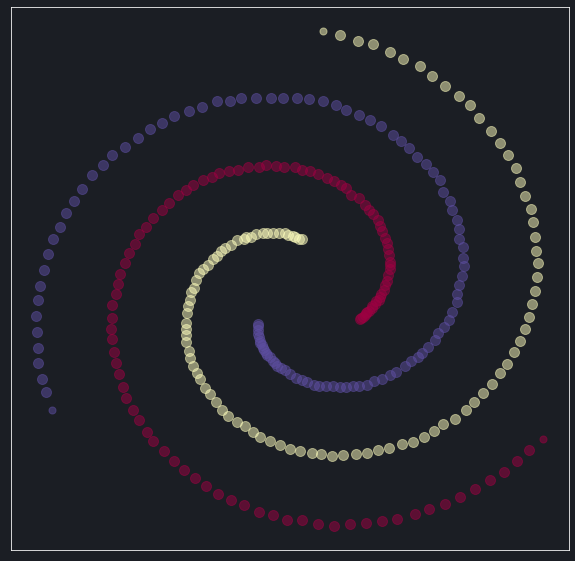

In [29]:
dbPlotMaker(SpiralFile, DBSpiral_unique_labels, DBSpiral_labels, DBSpiralـcore_samples_mask )

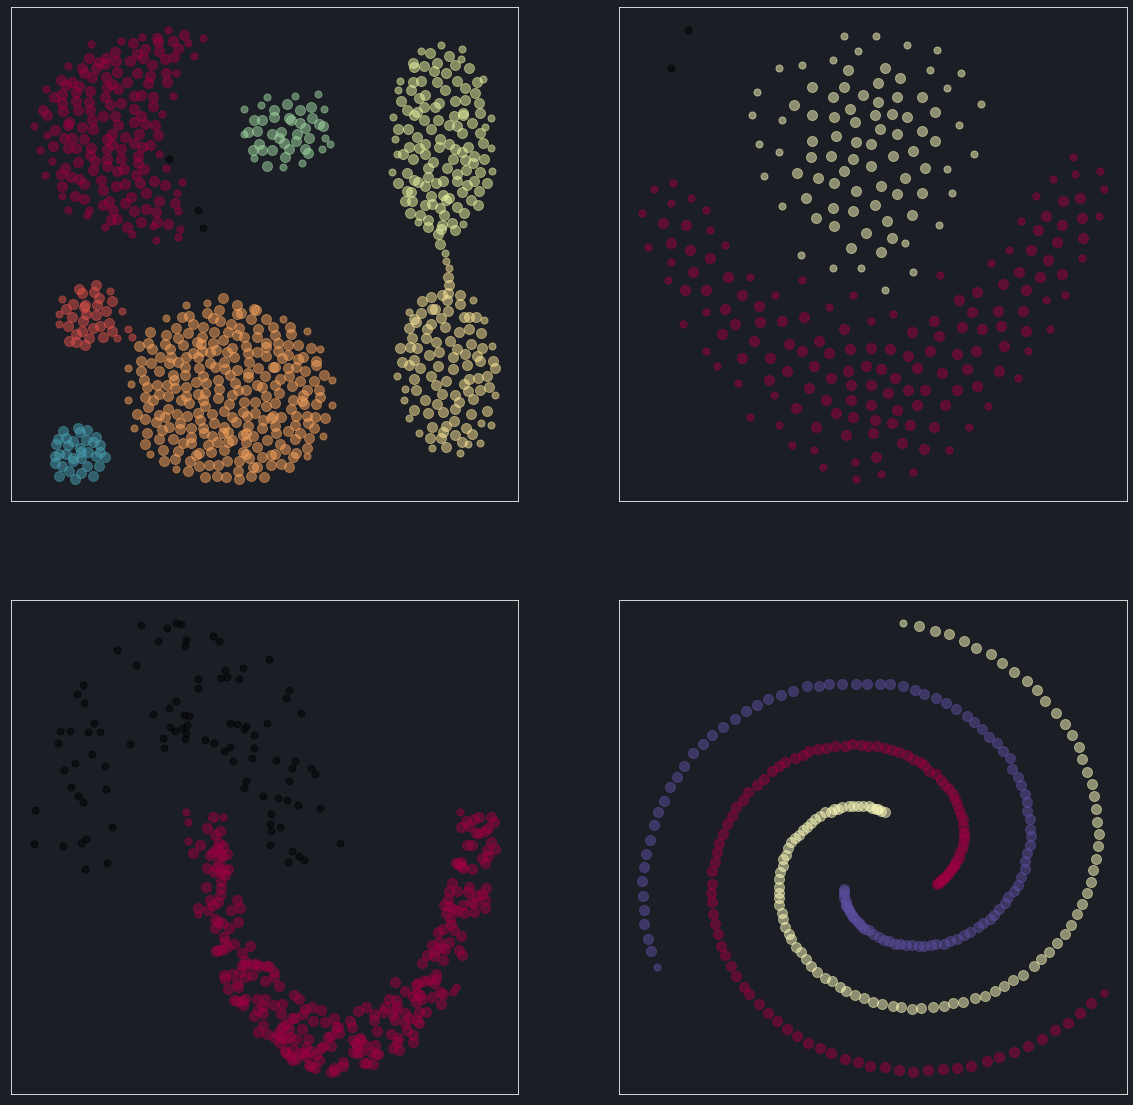

In [30]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax1 = dbPlotMaker(X=AggregationFile, unique_labels=DBAggregation_unique_labels, lables=DBAggregation_labels, core_samples_mask=DBAggregationـcore_samples_mask, parent_axs=ax1)
ax2 = dbPlotMaker(FlameFile, DBFlame_unique_labels, DBFlame_labels, DBFlameـcore_samples_mask, parent_axs=ax2)
ax3 = dbPlotMaker(JainFile, DBJain_unique_labels, DBJain_labels, DBJainـcore_samples_mask, parent_axs=ax3)
ax4 = dbPlotMaker(SpiralFile, DBSpiral_unique_labels, DBSpiral_labels, DBSpiralـcore_samples_mask, parent_axs=ax4)
